# Mobile Phone Price Range Prediction
Build a system that can predict price range (low/med/high/very high) for a mobile phone using data on available phones in the market.

In [81]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pickle

## Load the dataset

In [2]:
# Load data as pandas dataframe
df = pd.read_csv("mobile-phone.csv")

# Shape of the data
print(df.shape)

# Top 5 rows
df.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Comment:
* There is no NaN values
* There is no column of object datatype

In [4]:
# Summry stats
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Check for data imbalance
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

#### Comment:
It is a balanced data

### Bivariate Analysis

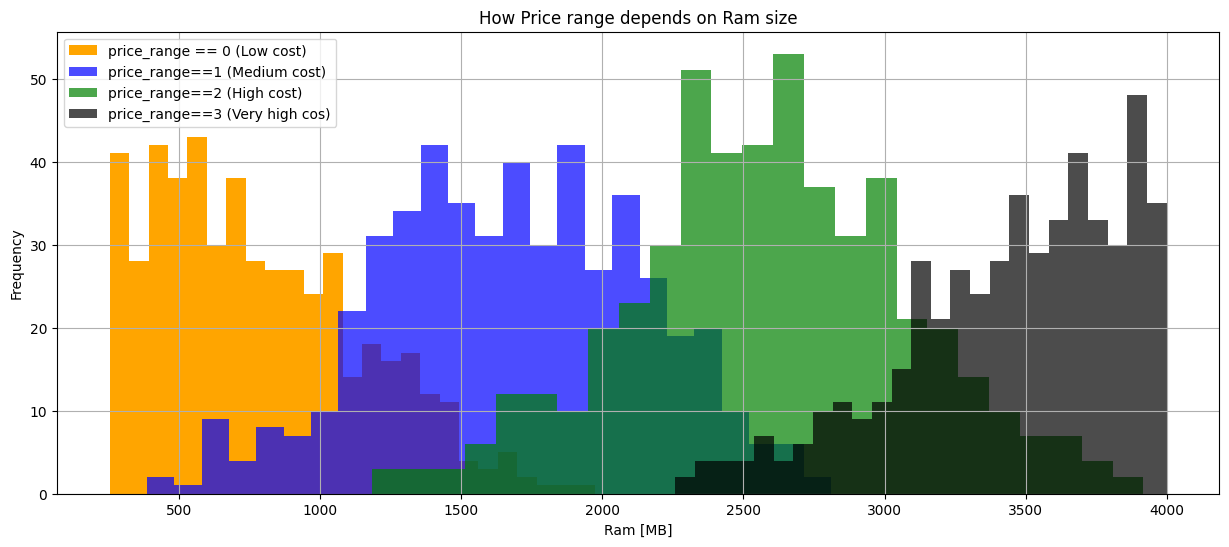

In [8]:
# How price depends on Ram
plt.figure(figsize=(15,6))
df[df['price_range']==0]["ram"].hist(color='orange', bins=25, label="price_range == 0 (Low cost)")
df[df['price_range']==1]["ram"].hist(color='blue', bins=25, label="price_range==1 (Medium cost)", alpha=0.7)
df[df['price_range']==2]["ram"].hist(color='green', bins=25, label="price_range==2 (High cost)", alpha=0.7)
df[df['price_range']==3]["ram"].hist(color='black', bins=25, label="price_range==3 (Very high cos)", alpha=0.7)

plt.legend()
plt.xlabel('Ram [MB]')
plt.ylabel("Frequency")
plt.title("How Price range depends on Ram size")
plt.show()

#### Comment:
We are seeing that higher ram size causes higher mobile cost

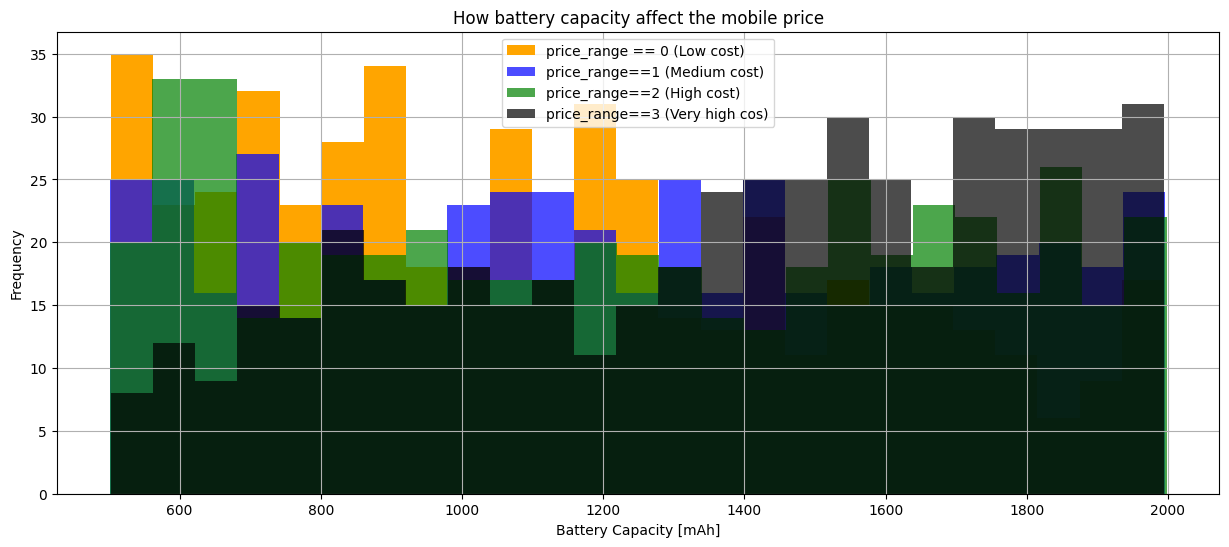

In [9]:
# How price depends on battery
plt.figure(figsize=(15,6))
df[df['price_range']==0]["battery_power"].hist(color='orange', bins=25, label="price_range == 0 (Low cost)")
df[df['price_range']==1]["battery_power"].hist(color='blue', bins=25, label="price_range==1 (Medium cost)", alpha=0.7)
df[df['price_range']==2]["battery_power"].hist(color='green', bins=25, label="price_range==2 (High cost)", alpha=0.7)
df[df['price_range']==3]["battery_power"].hist(color='black', bins=25, label="price_range==3 (Very high cos)", alpha=0.7)

plt.legend()
plt.xlabel('Battery Capacity [mAh]')
plt.ylabel("Frequency")
plt.title("How battery capacity affect the mobile price")
plt.show()

#### Comment:
* Price range depends on battery capacity but not too much.
* Low cost mobile phone has battery capacity almost less than 1300 and very high cost mobile phone has high capacity battery.
* But mid and high cost mobile phone does not depend on battery capacity so much.

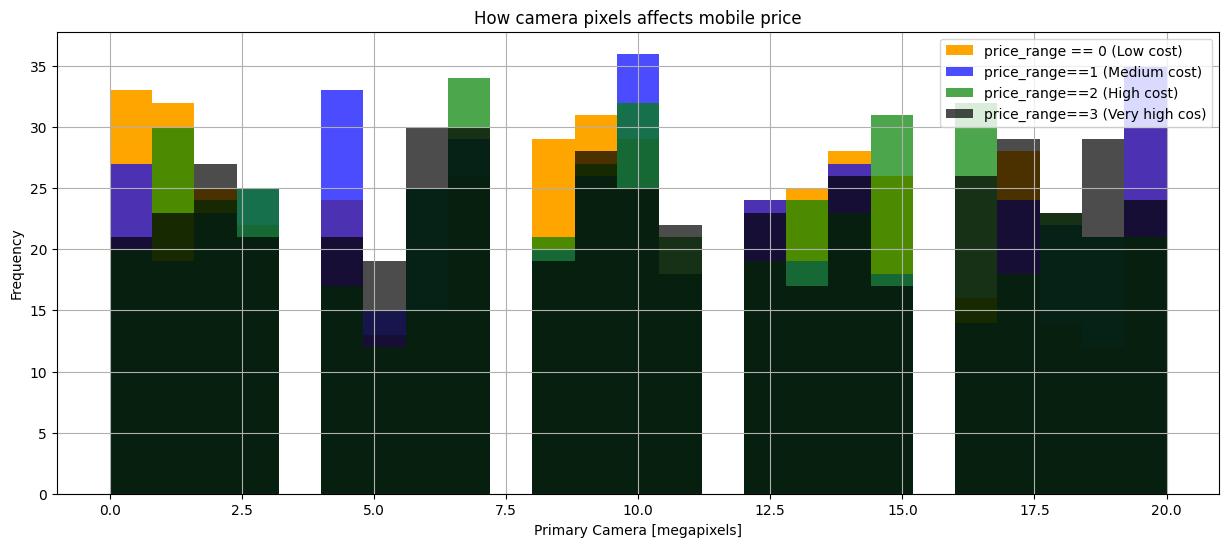

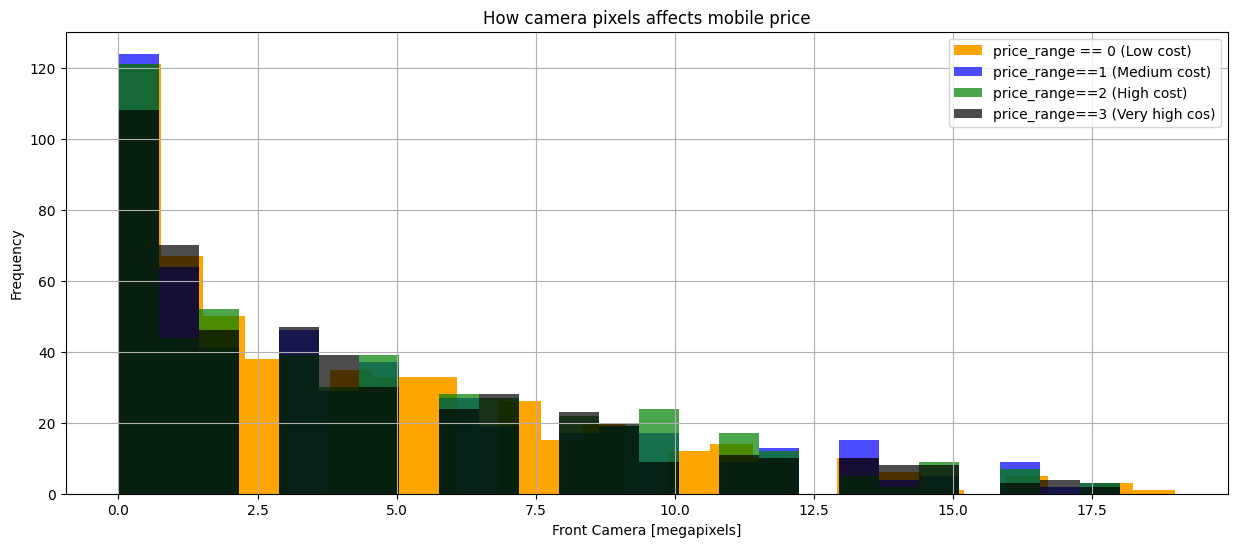

In [10]:
# How price depends on camera
camera_type = {'pc':"Primary Camera", 'fc': "Front Camera"}

for key, value in camera_type.items():
    plt.figure(figsize=(15,6))
    df[df['price_range']==0][key].hist(color='orange', bins=25, label="price_range == 0 (Low cost)")
    df[df['price_range']==1][key].hist(color='blue', bins=25, label="price_range==1 (Medium cost)", alpha=0.7)
    df[df['price_range']==2][key].hist(color='green', bins=25, label="price_range==2 (High cost)", alpha=0.7)
    df[df['price_range']==3][key].hist(color='black', bins=25, label="price_range==3 (Very high cos)", alpha=0.7)
    plt.legend()
    plt.xlabel(f'{value} [megapixels]')
    plt.ylabel("Frequency")
    plt.title("How camera pixels affects mobile price")
    plt.show()

#### Comment:
It is clear that primary camera's pixels size highly impact the mobile price than front camera's pixel size

## Splitting data

In [11]:
# Split into features and target
target = 'price_range'
features = df.columns[:-1]

# Feature set and target
X = df[features]
y = df[target]

# Shape
print("X Shape : ", X.shape)
print("y Shape : ", y.shape)

X Shape :  (2000, 20)
y Shape :  (2000,)


In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape
print("X_train Shape : ", X_train.shape)
print("y_train Shape : ", y_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (1600, 20)
y_train Shape :  (1600,)
X_test Shape :  (400, 20)
y_test Shape :  (400,)


## Building Model (Decision Tree)

In [13]:
# Create pipeline
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

# Estimation of parameter
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


## Evalution

In [14]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 2, 1, 3, 0, 2, 3, 1, 0,
       2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1,
       0, 0, 2, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 0, 1, 2, 3, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       2, 2, 1, 1, 0, 0, 0, 0, 3, 3, 0, 3, 0, 1, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 1, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 2, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 2,
       2, 1, 2, 0, 2, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 3, 3, 3, 3, 0, 0, 0, 1, 3, 3,

In [15]:
# Actual y and predicted y
pd.DataFrame({"Actual": y_test, "Predicted":y_pred}).head(10).reset_index(drop=True)

,Actual,Predicted
0,0,0
1,2,2
2,1,1
3,3,3
4,1,1
5,1,1
6,2,2
7,0,0
8,3,2
9,1,1


In [16]:
# Check the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       105
           1       0.71      0.82      0.76        91
           2       0.76      0.70      0.73        92
           3       0.88      0.88      0.88       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



#### Comment:
We are seeing that our model accuracy is 82% but still it could be better. Let's try with random forest classifier.

In [17]:
# Confusion matrix
confusion_matrix(y_pred, y_test)

array([[88,  9,  0,  0],
       [17, 75, 14,  0],
       [ 0,  7, 64, 13],
       [ 0,  0, 14, 99]])

# Use Random Forest Classifier

In [22]:
# Make the model Pipeline
rfc = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
)

# Fit the model
rfc.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2


### Evaluation

In [23]:
# Training accuracy
y_train_pred = rfc.predict(X_train)

# Check accuracy
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [24]:
# Prediction
y_pred = rfc.predict(X_test)

# Check the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.87      0.88      0.87        91
           2       0.82      0.85      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [41]:
# See feature importance
feat = rfc[0].get_feature_names_out()
importance = rfc.named_steps["randomforestclassifier"].feature_importances_

# Create series
feat_imp = pd.Series(importance, index=feat)
feat_imp.sort_values(key=abs)

three_g          0.004936
touch_screen     0.005077
four_g           0.005188
wifi             0.005542
blue             0.005703
dual_sim         0.005863
n_cores          0.019561
fc               0.021322
m_dep            0.022149
clock_speed      0.023649
sc_h             0.024620
sc_w             0.024688
pc               0.026581
talk_time        0.026953
int_memory       0.034619
mobile_wt        0.036260
px_height        0.054679
px_width         0.054845
battery_power    0.074129
ram              0.523637
dtype: float64

#### Comment
We are seeing that features ["three_g", "touch_screen",  "four_g", "wifi", "blue", "dual_sim"] has very low importance. So, we will drop these features.

### Remove unimportant features
We are removing unimportant features from the features set X

In [49]:
X_impfeat = X.drop(columns=["three_g", "touch_screen",  "four_g", "wifi", "blue", "dual_sim"])

print(X_impfeat.shape)
X_impfeat.head()

(2000, 14)


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


### Split again

In [51]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_impfeat, y, test_size=0.2, random_state=42)

# Shape
print("X_train Shape : ", X_train.shape)
print("y_train Shape : ", y_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (1600, 14)
y_train Shape :  (1600,)
X_test Shape :  (400, 14)
y_test Shape :  (400,)


### Model builiding and testing Again

In [52]:
# Make the model Pipeline
rfc = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
)

# Fit the model
rfc.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2


In [53]:
# Training accuracy
y_train_pred = rfc.predict(X_train)

# Check accuracy
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [54]:
# Testing accuracy
y_pred = rfc.predict(X_test)

# Check the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.88      0.88        91
           2       0.81      0.86      0.83        92
           3       0.93      0.88      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#### Comment:
Now our model test accuracy is 90% that is better than previous model. Let's go for some fine tuning to improve accurcy more.

# Hyperparameter Tuning

In [68]:
# Giving the possible optimal values
n_estimators=[50,100,150]           # Number of trees:
max_features=[0.5,0.6,0.7]          # Number of features used to split at each node
max_depth=[9,10,11]                 # Max depth for each tree
max_samples=[0.7,0.8,0.85]          # Number of samples
min_samples_split = [2, 5, 10]      # Minimum samples required to split an internal node
min_samples_leaf = [1, 2, 4]        # Minimum samples required to be at a leaf node
max_leaf_nodes = [None, 20, 30, 50] # Maximum number of leaf nodes 
class_weight = [None, 'balanced']   # Class weighting to handle any class imbalance

# Create the parameter for grid
param_grid={
    'randomforestclassifier__n_estimators':n_estimators,
    'randomforestclassifier__max_features':max_features,
    'randomforestclassifier__max_depth':max_depth,
    'randomforestclassifier__max_samples':max_samples,       
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    'randomforestclassifier__max_leaf_nodes': max_leaf_nodes,
    'randomforestclassifier__class_weight': class_weight
    }

# Grid Search instantiation
rf_grid = GridSearchCV(rfc, param_grid, cv=5)

# Extimate 
rf_grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'randomforestclassifier__class_weight': [None, 'balanced'], 'randomforestclassifier__max_depth': [9, 10, ...], 'randomforestclassifier__max_features': [0.5, 0.6, ...], 'randomforestclassifier__max_leaf_nodes': [None, 20, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [ ]:
# Get best combination
print("Best Parameters: ",rf_grid.best_params_)

# Get best Score
print("\nBest score: ",rf_grid.best_score_)

Best Parameters:  {'randomforestclassifier__class_weight': None, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__max_samples': 0.85, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 150}

Best score:  0.9012499999999999


In [70]:
# The best pipeline after grid search
best_rfc = rf_grid.best_estimator_

In [71]:
y_train_pred = best_rfc.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       0.99      1.00      0.99       408
           3       1.00      0.99      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [72]:
# Testing accuracy
y_pred = best_rfc.predict(X_test)

# Check the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.93      0.91        91
           2       0.85      0.87      0.86        92
           3       0.94      0.89      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



#### Comment:
We are seeing that our model is still overfitted. So, we should try with other ML algorithm

## Logistic Regression
Let's try with logistic Regression

In [77]:
# Instantiate the model
logreg =  make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)

# fit the model
logreg.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [79]:
# Traing set validation
y_train_pred = logreg.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.96      0.96      0.96       409
           2       0.97      0.96      0.96       408
           3       0.98      0.99      0.98       388

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [80]:
# Testing accuracy
y_pred = logreg.predict(X_test)

# Check the accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.96      1.00      0.98        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



#### Comment
We are seeing that **Logistic Regression model** is doing better performance than Decision tree or Random forest model. So, we should take the Logistic regression model as our final model.

## Save and use the model

In [82]:
# Save the model
with open('model.pkl','wb') as f:
    pickle.dump(logreg, f)

In [83]:
# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [90]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [107]:
# Make prediction
target_labels = {0 : "Lowcost", 1 : "Medium cost", 2: "High cost", 3: "Very high cos"}

# Prediction
y_pred = loaded_model.predict(X_test)

# Create a data frame of prediction
df_pred = pd.DataFrame({'y_actual': y_test, 'y_predicted':y_pred})
df_pred.head()

,y_actual,y_predicted
1860,0,0
353,2,2
1333,1,1
905,3,3
1289,1,1


In [108]:
# Prediction with label tagging
df_pred["pred_label"] = df_pred["y_predicted"].map(target_labels)
df_pred.head(10)

,y_actual,y_predicted,pred_label
1860,0,0,Lowcost
353,2,2,High cost
1333,1,1,Medium cost
905,3,3,Very high cos
1289,1,1,Medium cost
1273,1,1,Medium cost
938,2,2,High cost
1731,0,0,Lowcost
65,3,3,Very high cos
1323,1,1,Medium cost
